## Probeweise Durchführung einer Teststatistik für die durchschnittlichen Verslängen pro Gedicht

1. Hypothesen
- **Nullhypothese (H0)**: Es gibt **keinen signifikanten Unterschied** in der Verslänge zwischen den beiden Subsamples (M/W).
- **Alternativhypothese (H1)**: Es gibt **einen signifikanten Unterschied** in der Verslänge zwischen den beiden Subsamples (M/W).
    - &rarr; "Frauen schreiben Gedichte mit durchschnittlich längeren Verse als Männer. Männer schreiben im Verlgeich zu Frauen kürzere Verse in ihren Gedichten."

In [1]:
import json
import os
import statistics
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import ttest_ind, shapiro, mannwhitneyu

2. Daten vorbereiten

Für jedes Teilkorpus:
- Dictionary mit Gedichttitel als Key
- und durchschnittlicher Anzahl von Tokens/Vers für jeweiliges Gedicht

In [2]:
# Erstellung eines Dictionarys für jedes Teilkorpus (M/W)
# Key: Gedichttitel, Value: durchschnittliche Anzahl von Tokens/Vers

def count_tokens(poem):
    total_tokens = 0
    for line in poem.values():
        text = line['text']
        tokens = text.split()
        total_tokens += len(tokens)
    return total_tokens

# Ordnerpfad mit den JSON-Dateien
#folder_path = 'corpus_selenium_m'/'corpus_selenium_w'

def avg_tokens_per_line(folder_path: str):
# Dictionary zur Speicherung der Ergebnisse
    average_tokens_per_line = {}

    # Durchlaufe die JSON-Dateien im Ordner
    for filename in os.listdir(folder_path):
        if filename.endswith('.json'):
            file_path = os.path.join(folder_path, filename)
            with open(file_path, 'r', encoding='utf8') as file:
                poem_data = json.load(file)
                poem_lines = poem_data['poem']
                title = poem_data['title']
                try:
                    num_lines = len(poem_lines)
                    num_tokens = count_tokens(poem_lines)
                    average_tokens = num_tokens / num_lines
                    average_tokens_per_line[title] = average_tokens  # optional mit Runden: round(average_tokens, 3)
                except:
                    continue
    
    return average_tokens_per_line

In [3]:
avg_vers_lengths_m = avg_tokens_per_line('corpus_finished_m')
print(avg_vers_lengths_m)
print(f'N: {len(avg_vers_lengths_m)}')

{'00-hera-mit-den-weissen-armen-kauft-am-flohmarkt-antiquitaeten-ein-16612': 4.419354838709677, '12-ein-zahlengedicht-826': 3.407766990291262, '125-episoden-imonki-16200': 11.1875, '1886-53': 4.0092592592592595, '2-uhr-16-gedicht-5230': 5.142857142857143, '21-uhr-39-gedicht-5233': 3.619047619047619, '3-artemis-16610': 6.931034482758621, '350': 3.8125, '6-5-1996-233': 6.5875, '6-zeus-kronion-16611': 28.571428571428573, '7-tage-der-cuba-bar-11579': 5.739130434782608, '7077': 3.5294117647058822, '8-11173': 6.64, '8-6588': 2.7142857142857144, 'abc-3222': 5.2, 'abc-683': 4.75, 'abendnachrichten-342': 4.5, 'abendrot-5350': 1.6, 'abends-3376': 7.888888888888889, 'abschied-mit-zigarren-8254': 7.285714285714286, 'abschied-von-gomera-5163': 5.575757575757576, 'abschrankung-isst-wegweiser-188': 3.5625, 'ach-2431': 5.5, 'ach-der-tisch-brzur-poesie-des-poedu-153': 7.40952380952381, 'ach-kinder-16431': 6.9, 'ach-waer-ein-ich-145': 4.666666666666667, 'achterbahntraeume-20': 2.5, 'actaeon-2-111': 8.25

In [4]:
avg_vers_lengths_w = avg_tokens_per_line('corpus_finished_w')
print(avg_vers_lengths_w)
print(f'N: {len(avg_vers_lengths_w)}')

{'21-september-5717': 4.384615384615385, '23-september-5718': 5.153846153846154, '4-januar-5721': 3.8461538461538463, '5-januar-5722': 3.8461538461538463, '6-januar-5723': 4.153846153846154, '7-november-5719': 5.3076923076923075, '8-november-5720': 5.0, 'ab-und-zuckert-es-15426': 7.333333333333333, 'abloese-12371': 8.76923076923077, 'about-horst-janssen-gegen-verfluchtes-chaos-geheiligte-ordnung-13681': 4.0, 'about-horst-janssen-storytelling-13683': 4.631578947368421, 'about-horst-janssen-weisst-du-weisch-13682': 3.4444444444444446, 'about-neo-rauch-periphere-zuneigung-zu-new-york-13679': 3.5217391304347827, 'about-neo-rauch-re-13680': 5.473684210526316, 'abrechnung-gegen-1802': 4.095238095238095, 'abschied-1451': 8.11111111111111, 'abschiedslied-4292': 4.333333333333333, 'abstossung-kippeln-tasten-kontakt-10154': 6.333333333333333, 'abwendig-haengt-der-mond-im-dunst-1284': 5.409090909090909, 'abwesenheiten-i-i-am-sitting-room-12795': 2.8, 'abwesenheiten-x-batjuskov-12799': 9.375, 'aha

3. Deskriptive Statistik
- Durchschnitt (Mittelwert)
- Standardabweichung der Verslängen für jedes Subsample

In [5]:
def calculate_statistics(verse_lengths):
    # Berechnung des Durchschnitts (Mittelwert)
    average = statistics.mean(verse_lengths)
    
    # Berechnung der Standardabweichung
    std_deviation = statistics.stdev(verse_lengths)
    
    return average, std_deviation

# Extrahiere die Verslängen aus dem Dictionary
verse_lengths_m = list(avg_vers_lengths_m.values())
verse_lengths_w = list(avg_vers_lengths_w.values())

# Berechne Durchschnitt und Standardabweichung
average_length_m, std_deviation_m = calculate_statistics(verse_lengths_m)
average_length_w, std_deviation_w = calculate_statistics(verse_lengths_w)

# Ausgabe der Ergebnisse
print("Durchschnittliche Verslänge Männer:", average_length_m)
print("Durchschnittliche Verslänge Frauen:", average_length_w)
print("Standardabweichung der Verslänge Männer:", std_deviation_m)
print("Standardabweichung der Verslänge Frauen:", std_deviation_w)

Durchschnittliche Verslänge Männer: 6.9741709508315015
Durchschnittliche Verslänge Frauen: 8.016681654072297
Standardabweichung der Verslänge Männer: 13.376271139853419
Standardabweichung der Verslänge Frauen: 18.04036996515367


4. Statistischer Test

## t-Test:
- Ergebnis: p-Wert
- gibt an, wie wahrscheinlich es ist, dass der beobachteter Unterschied in der Verslänge zwischen den Subsamples zufällig ist
- kleiner p-Wert (kleiner als 0,05) bedeutet statistische Signifikanz
- p-Wert als Basis für Entscheidung, ob die Nullhypothese abgelehnt wird oder nicht

In [6]:
# Durchschnittliche Verslänge und Standardabweichung für den Subsample mit männlichen Autoren siehe oben
sample_size_m = len(verse_lengths_m)

# Durchschnittliche Verslänge und Standardabweichung für den Subsample mit weiblichen Autoren siehe oben
sample_size_w = len(verse_lengths_w)

# Durchführung des t-Tests
t_statistic, p_value = ttest_ind([average_length_m], [average_length_w],
                                alternative='two-sided',
                                equal_var=False)

# Berechnung der Degrees of Freedom
df = ((std_deviation_m ** 2 / sample_size_m + std_deviation_w ** 2 / sample_size_w) ** 2) / (
        (std_deviation_m ** 2 / sample_size_m) ** 2 / (sample_size_m - 1) + (
        std_deviation_w ** 2 / sample_size_w) ** 2 / (sample_size_w - 1))

# Ausgabe der Ergebnisse
print("t-Statistic:", t_statistic)
print("p-Value:", p_value)
print("Degrees of Freedom:", df)

t-Statistic: nan
p-Value: nan
Degrees of Freedom: 1659.4647601134475


C:\Users\cravi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_stats_py.py:1103: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
C:\Users\cravi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_stats_py.py:1103: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


Mögliche Ursache/Problem für Fehlermeldung:

- Voraussetzung für t-Test (siehe Stefanowitsch, Kap. 6, S. 196): Normalverteilung, nur sehr kleine Unterschiede zwischen den Subsamples, Ausreißer oder sehr starke Abweichungen 

&rarr; testen, ob vorliegende Daten normalverteilt sind

In [7]:
# Funktion zum Durchführen des Shapiro-Wilk-Tests und zur Interpretation der Ergebnisse
def test_normality(data, sample_name):
    stat, p_value = shapiro(data)
    alpha = 0.05  # Signifikanzniveau
    print(f"Shapiro-Wilk-Test für {sample_name}:")
    print("Teststatistik:", stat)
    print("p-Wert:", p_value)
    if p_value > alpha:
        print(f"Die Tokenfrequenzen für {sample_name} sind normalverteilt.")
    else:
        print(f"Die Tokenfrequenzen für {sample_name} sind nicht normalverteilt.")

# Durchführung des Tests für beide Subsamples
test_normality(verse_lengths_m, "Sample M")
test_normality(verse_lengths_w, "Sample W")

Shapiro-Wilk-Test für Sample M:
Teststatistik: 0.16902726888656616
p-Wert: 0.0
Die Tokenfrequenzen für Sample M sind nicht normalverteilt.
Shapiro-Wilk-Test für Sample W:
Teststatistik: 0.19394713640213013
p-Wert: 0.0
Die Tokenfrequenzen für Sample W sind nicht normalverteilt.


Visualisierung der Verteilung

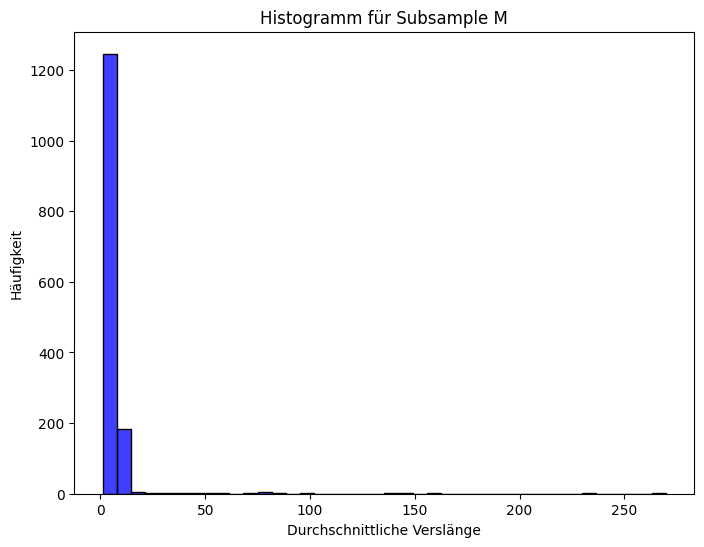

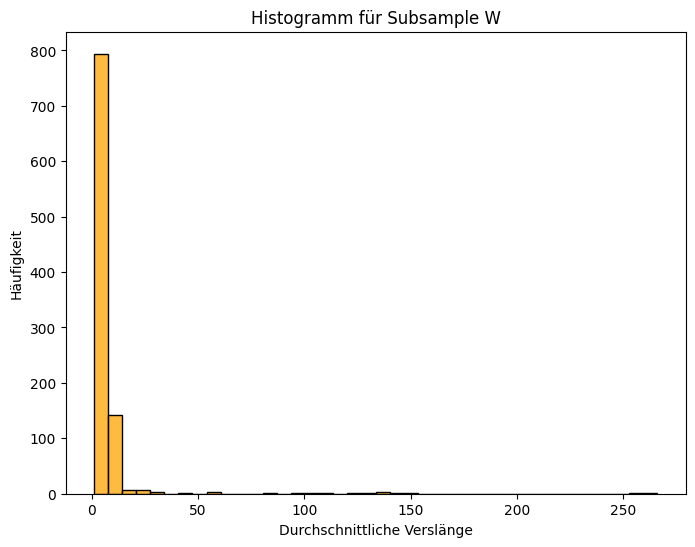

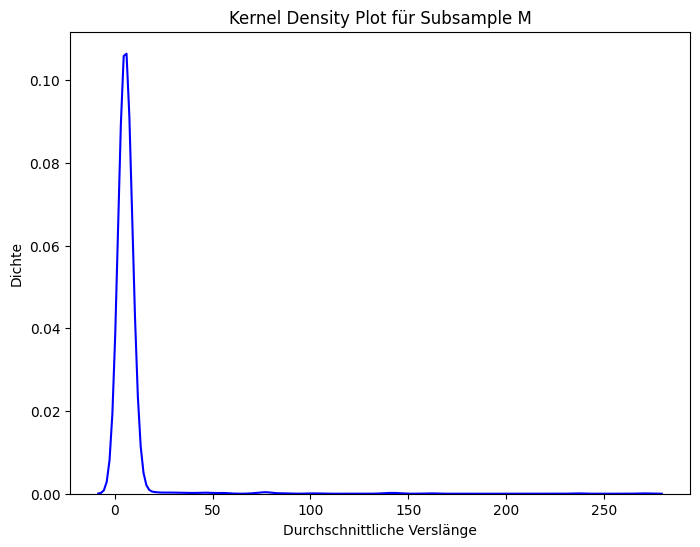

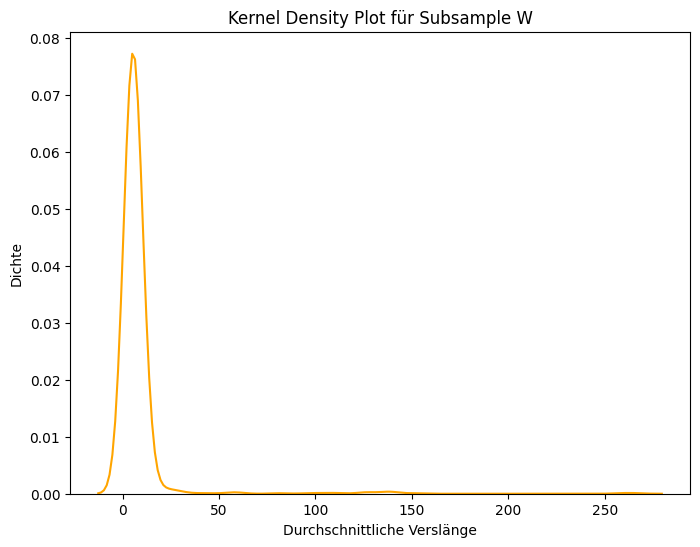

In [12]:
# Histogramm für Subsample M
plt.figure(figsize=(8, 6))
sns.histplot(verse_lengths_m, kde=False, color='blue', bins=40)
plt.title('Histogramm für Subsample M')
plt.xlabel('Durchschnittliche Verslänge')
plt.ylabel('Häufigkeit')
plt.show()

# Histogramm für Subsample W
plt.figure(figsize=(8, 6))
sns.histplot(verse_lengths_w, kde=False, color='orange', bins=40)
plt.title('Histogramm für Subsample W')
plt.xlabel('Durchschnittliche Verslänge')
plt.ylabel('Häufigkeit')
plt.show()

# Kernel Density Plot für Subsample M
plt.figure(figsize=(8, 6))
sns.kdeplot(verse_lengths_m, color='blue')
plt.title('Kernel Density Plot für Subsample M')
plt.xlabel('Durchschnittliche Verslänge')
plt.ylabel('Dichte')
plt.show()

# Kernel Density Plot für Subsample W
plt.figure(figsize=(8, 6))
sns.kdeplot(verse_lengths_w, color='orange')
plt.title('Kernel Density Plot für Subsample W')
plt.xlabel('Durchschnittliche Verslänge')
plt.ylabel('Dichte')
plt.show()

&rarr; **t-Test** (= Test für Kardinaldaten) kann nicht verwendet werden, weil Daten nicht normalverteilt sind!

## &rarr; **Mann-Whitney-U-Test** (= Test für Ordinaldaten)
- Ausweichmöglichkeit, wenn t-Test wegen nicht normalverteilten Daten nicht sinnvoll ist (siehe Stefanowitsch, Kap. 6, S. 198)

In [9]:
# Durchführung des Mann-Whitney-U-Tests
u_statistic, p_value = mannwhitneyu(verse_lengths_m, verse_lengths_w, alternative='two-sided')

# Ausgabe der Ergebnisse
print("Mann-Whitney-U-Test:")
print("U-Statistik:", u_statistic)
print("p-Wert:", p_value)

if p_value > 0.05:
    print("Es gibt keinen signifikanten Unterschied zwischen den Subsamples.")
else:
    print("Es gibt einen signifikanten Unterschied zwischen den Subsamples.")

print(f"(U = {u_statistic}, N1 = {sample_size_m}, N2 = {sample_size_w}, p > 0.05)")

Mann-Whitney-U-Test:
U-Statistik: 704902.5
p-Wert: 0.8727225749203591
Es gibt keinen signifikanten Unterschied zwischen den Subsamples.
(U = 704902.5, N1 = 1459, N2 = 970, p > 0.05)


In [10]:
# Berechne die Effektstärke für Mann-Whitney-U-Test (Cramer's V)
n1 = sample_size_m
n2 = sample_size_w
effect_size = np.sqrt(u_statistic / (n1 * n2))

print("Effektstärke (Cramer's V):", effect_size)

Effektstärke (Cramer's V): 0.7057502039740932


5. Visualisierung

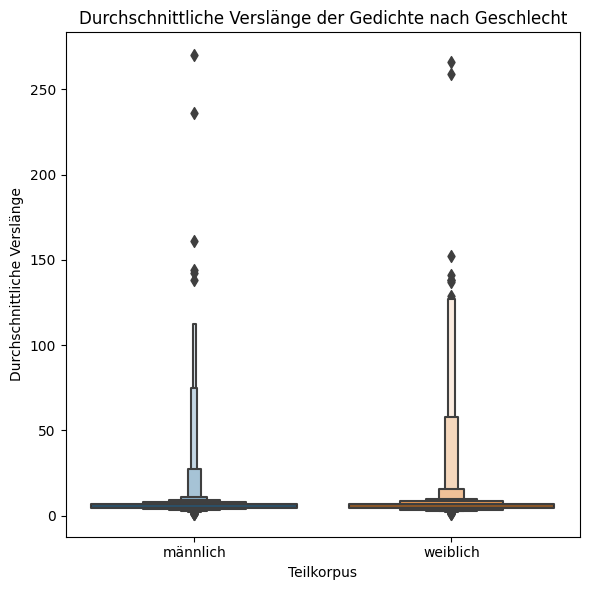

In [11]:
# Zusammenführen der Daten in einem DataFrame für seaborn
import pandas as pd
data = pd.DataFrame({
    "Geschlecht": ["männlich"] * sample_size_m + ["weiblich"] * sample_size_w,
    "Durchschnittliche Verslänge": verse_lengths_m + verse_lengths_w
})

# Boxplot erstellen
fig, ax = plt.subplots(figsize=(6, 6))
sns.boxenplot(x="Geschlecht", y="Durchschnittliche Verslänge", data=data, ax=ax)

# Label und Titel bestimmen
plt.xlabel("Teilkorpus")
plt.ylabel("Durchschnittliche Verslänge")
plt.title("Durchschnittliche Verslänge der Gedichte nach Geschlecht")


# Plot anzeigen
plt.tight_layout()
plt.show()